In [1]:
import os
os.chdir('../../')

In [3]:
from spikelearn import io, select, to_feature_array, SHORTCUTS
from spikelearn.data import remove_baseline
from spikelearn.measures import ramping_p
from scipy.io import loadmat

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [4]:
%load_ext autoreload
%autoreload 2

Text(0.5,1.02,'Ramping neurons, trials > 1.5s')

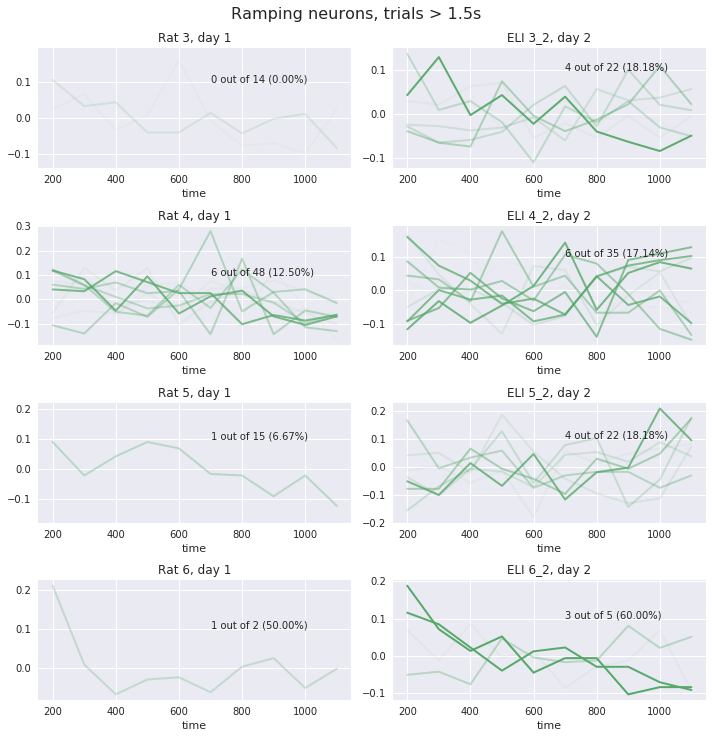

In [63]:
plt.figure(figsize=(10,10))
THRESHOLD = .05
alpha = lambda p: (((1-p)**10)**3)
for label in SHORTCUTS['groups']['EZ']:
    ax = plt.subplot(4, 2, (int(label[4]))*2-5 + ('_2' in label))
    data = io.load(label, 'no_smoothing')
    data = select(data, _min_duration=1.5,_mineq_quality=1)
    quality = data.reset_index().drop_duplicates('unit').set_index('unit').quality
    fr = data.cropped.reset_index().drop('trial',axis=1).groupby('unit').apply(lambda df: np.vstack(df.drop('unit',axis=1).values))
    rp = lambda df: ramping_p(df.value, df.time, range=(0,1500))
    fr = to_feature_array(data, subset='cropped')

    p_ramp = fr.reset_index().drop('trial', axis=1).melt(id_vars=['time']).groupby('unit').apply(rp)

    Z = (fr-fr.mean())/fr.std()
    for unit, p in p_ramp.iteritems():
        act = Z[unit].unstack('time').mean()
        act.plot(alpha=alpha(p), color='r' if quality[unit]==0 else'g', linewidth=2, ax=ax)
    plt.text(700,.1, '{} out of {} ({:.2%})'.format((p_ramp<THRESHOLD).sum(), p_ramp.shape[0],(p_ramp<THRESHOLD).mean()))
    if '_2' in label:
        plt.title('{}, day 2'.format(label))
    else:
        plt.title('Rat {}, day 1'.format(label[4]))


plt.tight_layout()
plt.suptitle('Ramping neurons, trials > 1.5s', y=1.02, fontsize=16)

Text(0.5,1.02,'Ramping neurons, trials > 1.5s and < 2.5s')

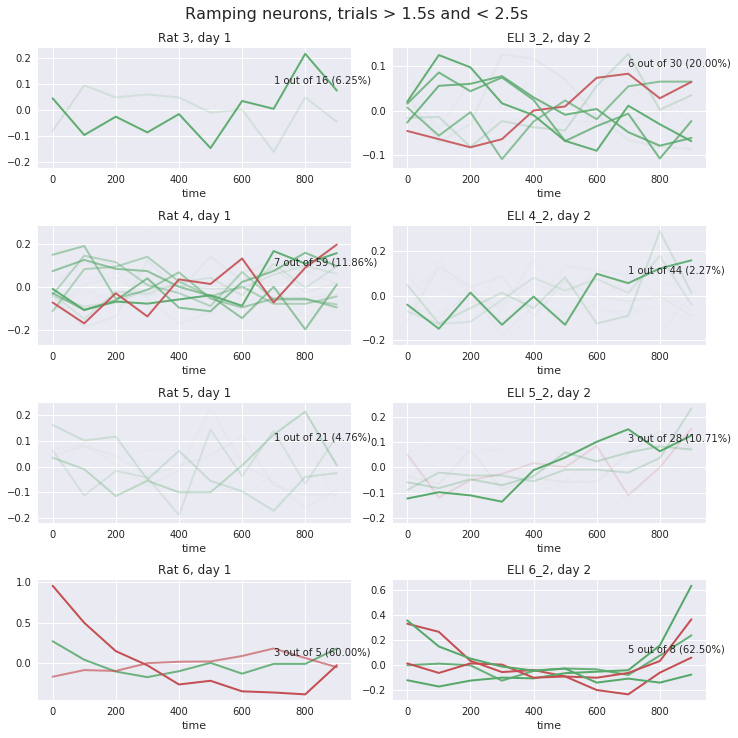

In [69]:
plt.figure(figsize=(10,10))
THRESHOLD = .05
for label in SHORTCUTS['groups']['EZ']:
    ax = plt.subplot(4, 2, (int(label[4]))*2-5 + ('_2' in label))
    data = io.load(label, 'no_smoothing_norm')
    data = select(data, _min_duration=1.5, _max_duration=2.5)
    quality = data.reset_index().drop_duplicates('unit').set_index('unit').quality
    fr = data.cropped.reset_index().drop('trial',axis=1).groupby('unit').apply(lambda df: np.vstack(df.drop('unit',axis=1).values))
    rp = lambda df: ramping_p(df.value, df.time, range=(0,1500))
    fr = to_feature_array(data, subset='full')
    #fr = remove_baseline(fr, io.load(label,'baseline'),.5)

    p_ramp = fr.reset_index().drop('trial', axis=1).melt(id_vars=['time']).groupby('unit').apply(rp)

    Z = (fr-fr.mean())/fr.std()
    for unit, p in p_ramp.iteritems():
        act = Z[unit].unstack('time').mean()
        act.plot(alpha=alpha(p), color='r' if quality[unit]==0 else'g', linewidth=2, ax=ax)
    plt.text(700,.1, '{} out of {} ({:.2%})'.format((p_ramp<THRESHOLD).sum(), p_ramp.shape[0],(p_ramp<THRESHOLD).mean()))
    if '_2' in label:
        plt.title('{}, day 2'.format(label))
    else:
        plt.title('Rat {}, day 1'.format(label[4]))


plt.tight_layout()
plt.suptitle('Ramping neurons, trials > 1.5s and < 2.5s', y=1.02, fontsize=16)

---

# Rampas gabi

Text(0.5,1.02,'Ramping neurons, trials > 1.5s and < 2.5s')

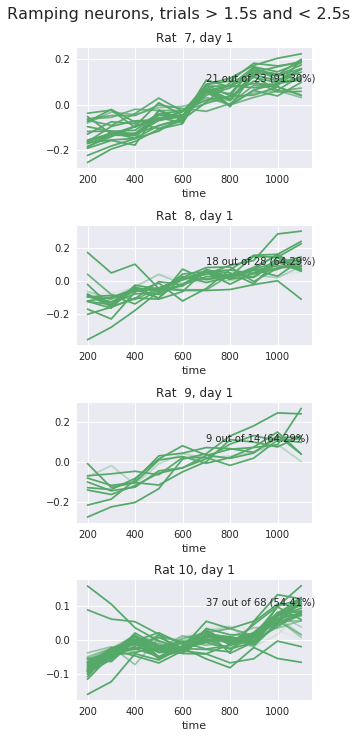

In [48]:
plt.figure(figsize=(4,10))
alpha = lambda p: (((1-p)**10)**10)**3
THRESHOLD = .01
for label in SHORTCUTS['groups']['DRRD']:
    ax = plt.subplot(4, 1, (int(label[-2:]))-6)
    data = io.load(label, 'no_smoothing')
    data = select(data, _min_duration=1.5,is_selected=True)#, _max_duration=2.5
    #quality = data.reset_index().drop_duplicates('unit').set_index('unit').quality
    fr = data.cropped.reset_index().drop('trial',axis=1).groupby('unit').apply(lambda df: np.vstack(df.drop('unit',axis=1).values))
    rp = lambda df: ramping_p(df.value, df.time, range=(0,1500))
    fr = to_feature_array(data, subset='cropped')

    p_ramp = fr.reset_index().drop('trial', axis=1).melt(id_vars=['time']).groupby('unit').apply(rp)

    Z = (fr-fr.mean())/fr.std()
    for unit, p in p_ramp.iteritems():
        act = Z[unit].unstack('time').mean()
        act.plot(alpha=alpha(p), color='g',ax=ax)# if quality[unit]==0 else'g', linewidth=2, ax=ax)
    plt.text(700,.1, '{} out of {} ({:.2%})'.format((p_ramp<THRESHOLD).sum(), p_ramp.shape[0],(p_ramp<THRESHOLD).mean()))
    if '_2' in label:
        plt.title('{}, day 2'.format(label))
    else:
        plt.title('Rat {}, day 1'.format(label[-2:]))


plt.tight_layout()
plt.suptitle('Ramping neurons, trials > 1.5s', y=1.02, fontsize=16)